<a href="https://colab.research.google.com/github/RosalRicardo/tweet-midia/blob/master/Clusteriza%C3%A7%C3%A3o_K_means_tweets_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Baixar os dados

In [88]:
!wget https://raw.githubusercontent.com/LabCidades/tweet-midia/master/dataset_tweets_midia.csv
df= pd.read_csv('dataset_tweets_midia.csv', dtype='unicode')
df_tweets = df[['user.name','full_text']]

train, test = train_test_split(df_tweets,test_size=0.2, random_state = 42)
conjunto_treino = train['full_text'].to_numpy()

!wget https://raw.githubusercontent.com/LabCidades/tweet-midia/master/principais_palavras_por_cluster%20-%20PREENCHER.csv
df_exclusao = pd.read_csv('/content/principais_palavras_por_cluster - PREENCHER.csv', dtype='unicode')

--2021-11-20 01:59:21--  https://raw.githubusercontent.com/LabCidades/tweet-midia/master/dataset_tweets_midia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79297807 (76M) [text/plain]
Saving to: ‘dataset_tweets_midia.csv.5’

dataset_tweets_midi 100%[===================>]  75.62M   171MB/s    in 0.4s    

2021-11-20 01:59:22 (171 MB/s) - ‘dataset_tweets_midia.csv.5’ saved [79297807/79297807]

--2021-11-20 01:59:23--  https://raw.githubusercontent.com/LabCidades/tweet-midia/master/principais_palavras_por_cluster%20-%20PREENCHER.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
H

## Pre-processamento dos dados

> Exclusão de palavras (pré-definidos)

In [118]:

df_exclusao = pd.read_csv('/content/principais_palavras_por_cluster - PREENCHER.csv', dtype='unicode')
df_exclusao.rename(columns = {'eliminar (1)':'eliminar'}, inplace = True)
df_exclusao = df_exclusao.query('eliminar == "1"')


> Tokenização e stop words


In [130]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
token_espaco = tokenize.WhitespaceTokenizer()

temp_stops = ['https','RT','co']
palavras_irrelevantes.extend(df_exclusao['termos'])
palavras_irrelevantes.extend(temp_stops)
print(len(palavras_irrelevantes))
tweets_processados = list()
for tweet in conjunto_treino:
    novo_tweet = list()
    palavras_tweet = token_espaco.tokenize(tweet)
    for palavra in palavras_tweet:
        if palavra not in palavras_irrelevantes:
            novo_tweet.append(palavra)
    tweets_processados.append(' '.join(novo_tweet))

348


> Vetorização e criação do bag of words

In [131]:
vetorizar = CountVectorizer(lowercase=False,max_features=2000)
bag_of_words = vetorizar.fit_transform(tweets_processados)
bag_of_words.shape
vetorizar.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '08',
 '09',
 '10',
 '100',
 '10h',
 '11',
 '11h',
 '12',
 '13',
 '14',
 '14h',
 '15',
 '15h',
 '16',
 '16h',
 '17',
 '17h',
 '18',
 '18h',
 '18h30',
 '19',
 '19h',
 '19h30',
 '1ª',
 '1º',
 '20',
 '200',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '20h',
 '21',
 '21h',
 '21h30',
 '22',
 '22h',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2AnosLulaLivre',
 '2OutForaBolsonaro',
 '2OutubroForaBolsonaro',
 '2ª',
 '2º',
 '30',
 '300',
 '31',
 '32',
 '32xSP',
 '40',
 '400',
 '45',
 '50',
 '500',
 '51',
 '60',
 '600',
 '70',
 '7SForaBolsonaro',
 '80',
 '90',
 '957816636',
 'AGORA',
 'AO',
 'ATENÇÃO',
 'AVerdadeVenceu',
 'Abração',
 'Acesse',
 'Acho',
 'Acompanhe',
 'Adoniran',
 'Agora',
 'Agência',
 'Ainda',
 'Alemanha',
 'Alexandre',
 'Alguém',
 'Aliás',
 'Alma_Preta',
 'Alves',
 'Além',
 'Amanhã',
 'Amazônia',
 'América',
 'Ana',
 'Andrade',
 'André',
 'AnotaAí',
 'Anotaí',
 'Antes',
 'Ao',
 'Aos'

> Clusterização dos tweets

In [121]:
true_k = 15
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=1)
model.fit(bag_of_words)

KMeans(max_iter=2000, n_clusters=15, n_init=1)

> principais termos por cluster

In [135]:
print("Principais termos por cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
termos = vetorizar.get_feature_names()
principais_palavras = []
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :40]:
        if termos[ind] not in palavras_irrelevantes:
          print(' %s' % termos[ind])
          principais_palavras.append(['cluster '+str(i),termos[ind]])
    print


Principais termos por cluster:
Cluster 0:
 dia
 Bom
 Hoje
 sobre
 hoje
 CCSP
 partir
 Brasil
 contra
 pessoas
 SP
 anos
 Bolsonaro
 acontece
 vai
 luta
 Na
 todo
 aqui
 ForaBolsonaro
 20h
 feira
 novembro
 CulturaSP
 bom
 grande
 dias
 Paulo
 13
 ruas
 segunda
 rapa
 Confira
 cada
 20
 redes
 pandemia
 onde
Cluster 1:
 CCSP
 São
 sobre
 Paulo
 SP
 Saiba
 dia
 Confira
 site
 Foto
 anos
 aqui
 GuiaDeEmpregoDasPeriferias
 zona
 grátis
 vai
 programação
 hoje
 show
 agendaSP
 acontece
 sábado
 apresenta
 Brasil
 atuar
 11
 partir
 música
 cinema
 Mural
 Sala
 Acesse
 periferias
 Unsplash
 dias
 feira
 Assista
Cluster 2:
 Brasil
 Bolsonaro
 sobre
 governo
 CPIdaCovid
 presidente
 contra
 pandemia
 país
 vai
 STF
 milhões
 hoje
 agora
 Covid
 vacina
 mil
 diz
 pessoas
 anos
 mundo
 Lula
 povo
 Saúde
 todo
 maior
 todos
 Ministério
 vacinas
 Jair
 corrupção
 ministro
 fazer
 disse
 Guedes
 falar
 saúde
 vez
 Hoje
 quer
Cluster 3:
 OsPingosNosIs
 assuntos
 hoje
 vivo
 Ao
 18h
 bgvMwHwNBL
 radi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [136]:
principais_palavras = np.array(principais_palavras)
pd.DataFrame(principais_palavras).to_excel("principais_palavras_por_cluster.xlsx")

In [128]:
todas_palavras = ' '.join([tweet for tweet in tweets_processados])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)

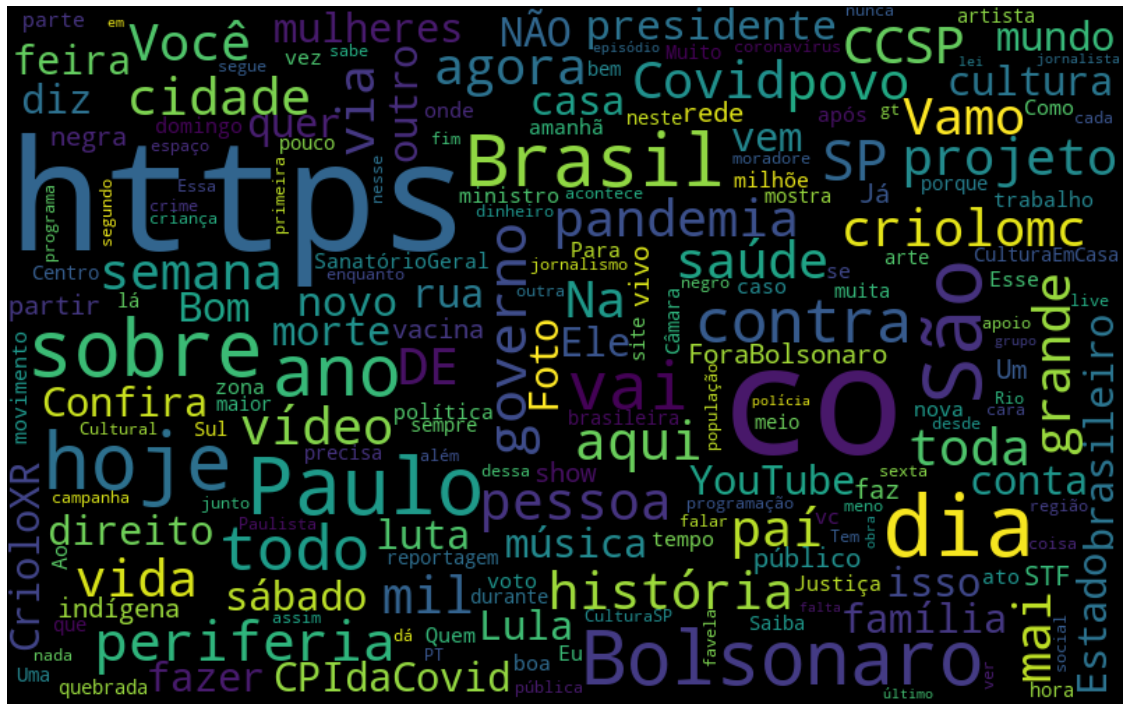

In [129]:
plt.figure(figsize=(20,14))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
clusters=model.predict(bag_of_words)
train['cluster'] = clusters
train.head(20)

,user.name,full_text,cluster
33614,Secretaria de Cultura e Economia Criativa,#CulturaEmCasa: Inscrições abertas para o bate...,1
5047,🧱 Agência Mural,"A propósito, nós também conversamos com as cri...",3
53964,Jornalistas Livres,Por Jonatas\n\n#tatudocaroculpadobolsonaro #Pa...,3
55241,Jornalistas Livres,Fora Bolsonaro genocida maldito miliciano #2Ou...,1
56200,Jornalistas Livres,"Daqui a pouco, 9h Narrativas Críticas, Andrea ...",3
28053,CRIOLO,https://t.co/ubEH8RX7y9,3
28403,CRIOLO,"Mais uma vez, que possamos entender as raízes ...",3
20680,A Banca,Ouvindo uns discos! https://t.co/oTR6TqCBYo,3
25830,RACIONAIS MC'S,RT @manobrown: https://t.co/t6N8R1Psxr,3
7598,Periferia em Movimento,"#Se o povo soubesse o talento que ele tem, não...",3
